## League of Legends - Korean Ranked Games - Visualization/Analysis

---

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#chunk = 10 ** 6
#df_chunk = pd.read_csv('match_data_version1.csv', chunksize=chunk, iterator=True)
#df_match = pd.concat(df_chunk, ignore_index = True)
df_winner = pd.read_csv('match_winner_data_version1.csv')
df_loser = pd.read_csv('match_loser_data_version1.csv')

In [60]:
print(df_winner.shape)
df_winner.head(3)

(108829, 18)


,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09


In [61]:
print(df_loser.shape)
df_loser.head(3)

(108829, 18)


,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion...",4.247263e+09
1,1,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio...",4.247156e+09
2,2,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio...",4.243963e+09


__Winner/Loser - Mean of Objectives__

In [86]:
tower_kills = df_winner['towerKills'].mean()
inhibitor_kills  = df_winner['inhibitorKills'].mean()
baron_kills = df_winner['baronKills'].mean()
dragon_kills = df_winner['dragonKills'].mean()
rift_kills = df_winner['riftHeraldKills'].mean()
mean_winner = [tower_kills, inhibitor_kills, baron_kills, dragon_kills, rift_kills]

tower_kills = df_loser['towerKills'].mean()
inhibitor_kills  = df_loser['inhibitorKills'].mean()
baron_kills = df_loser['baronKills'].mean()
dragon_kills = df_loser['dragonKills'].mean()
rift_kills = df_loser['riftHeraldKills'].mean()
mean_loser = [tower_kills, inhibitor_kills, baron_kills, dragon_kills, rift_kills]

index = ['Tower Kills', 'Inhibitor Kills', 'Baron Kills', 'Dragon Kills', 'Rift H. Kills']
df = pd.DataFrame({'Winner Objectives': mean_winner,'Loser Objectives': mean_loser}, index=index)

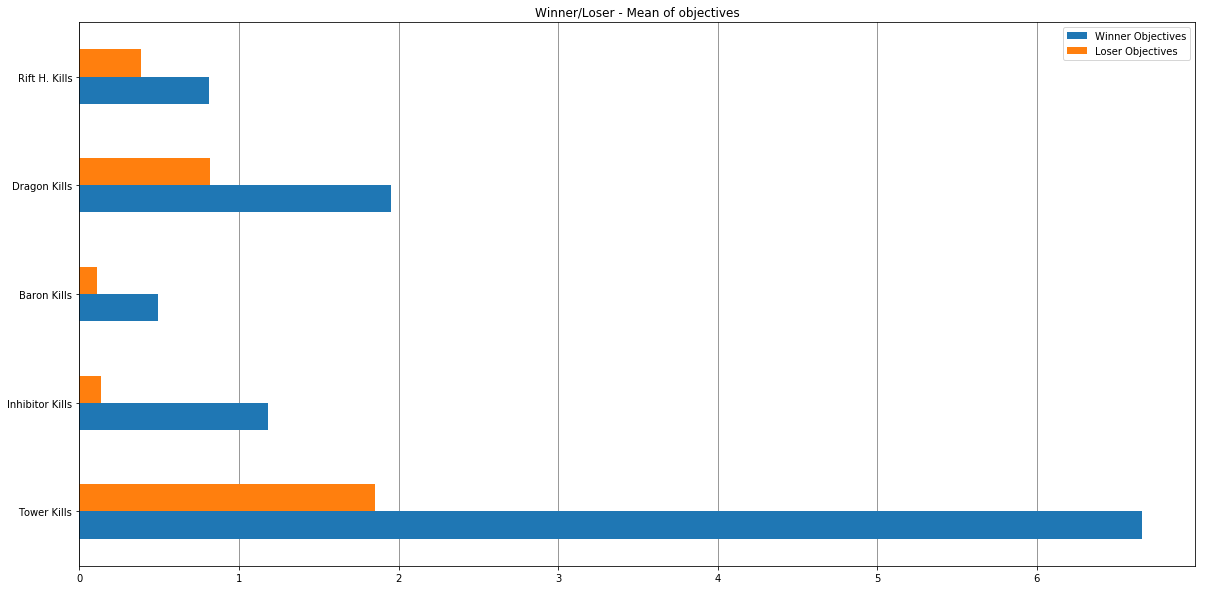

In [87]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
df.plot.barh(ax=ax)
ax.grid(True, axis='x', color='gray')
ax.set_axisbelow(True)
ax.set_title("Winner/Loser - Mean of objectives");

#### Studying the probability of win/lose by doing the first objectives

In [66]:
def color_label(df):
    cmap = plt.get_cmap('Spectral')
    if df.index.values[0] is True:
        return ['teal', 'tomato']
    else:
        return ['tomato','teal']

def create_piechart_1(df_obj_winner):
    fig = plt.figure(figsize=(20,10))
    ax_1 = fig.add_subplot(1,1,1)
    color_1 = color_label(df_obj_winner)
    df_obj_winner.plot.pie(ax=ax_1, title = 'Winner', autopct='%1.1f%%', colors=color_1)

def create_piechart_2(df_obj_winner, df_obj_loser):
    fig = plt.figure(figsize=(20,10))
    ax_1 = fig.add_subplot(1,2,1)
    color_1 = color_label(df_obj_winner)
    df_obj_winner.plot.pie(ax=ax_1, title = 'Winner', autopct='%1.1f%%', colors=color_1)
    ax_2 = fig.add_subplot(1,2,2)
    color_2 = color_label(df_obj_loser)
    df_obj_loser.plot.pie(ax=ax_2, title = 'Loser', autopct='%1.1f%%', colors=color_2)

__Impact of First Blood__

In [67]:
fb_winner = df_winner['firstBlood'].value_counts()
fb_loser = df_loser['firstBlood'].value_counts()

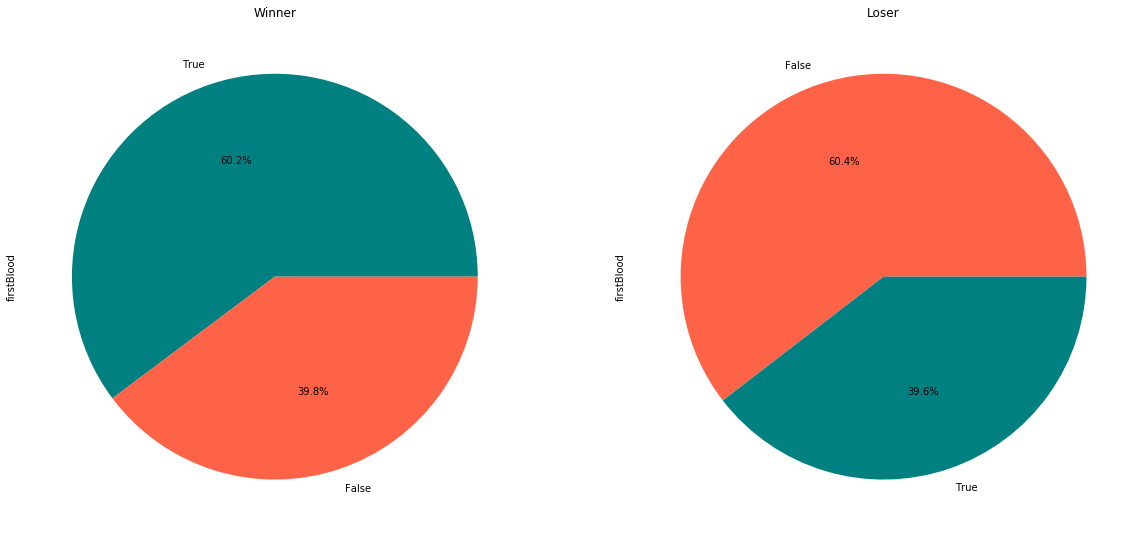

In [68]:
create_piechart_2(fb_winner, fb_loser)

__Impact of First Tower__

In [69]:
ft_winner = df_winner['firstTower'].value_counts()
ft_loser = df_loser['firstTower'].value_counts()

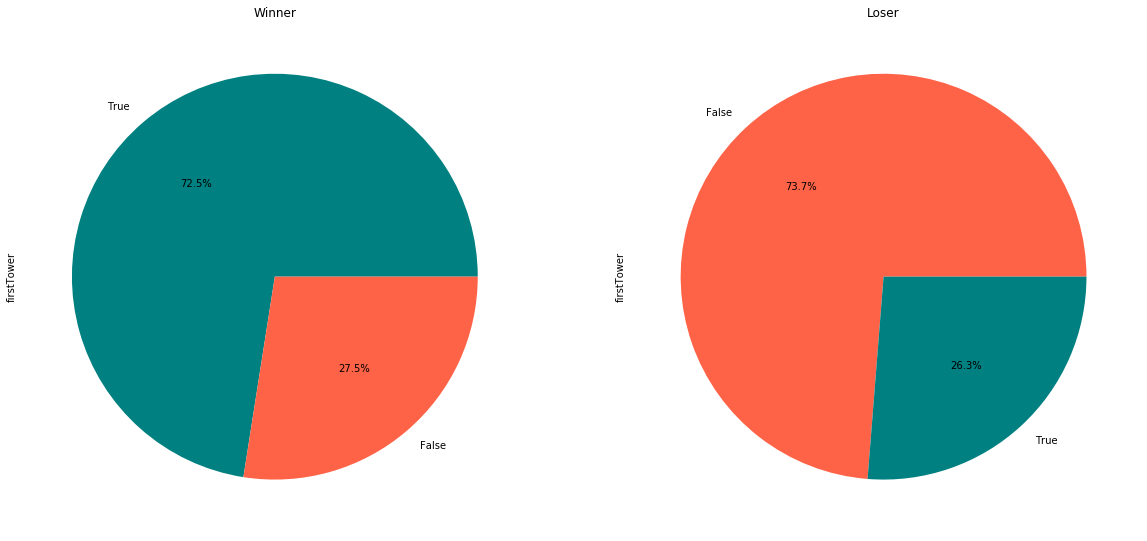

In [70]:
create_piechart_2(ft_winner, ft_loser)

__Impact of First Dragon__

In [71]:
fd_winner = df_winner['firstDragon'].value_counts()
fd_loser = df_loser['firstDragon'].value_counts()

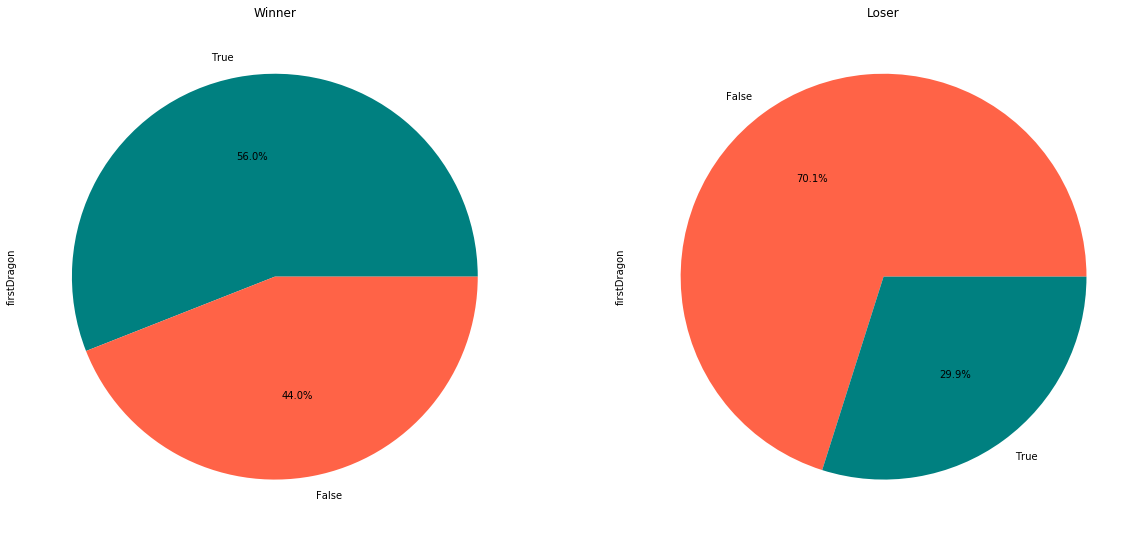

In [72]:
create_piechart_2(fd_winner, fd_loser)

__Impact of First Rift Herald__

In [73]:
fr_winner = df_winner['firstDragon'].value_counts()
fr_loser = df_loser['firstDragon'].value_counts()

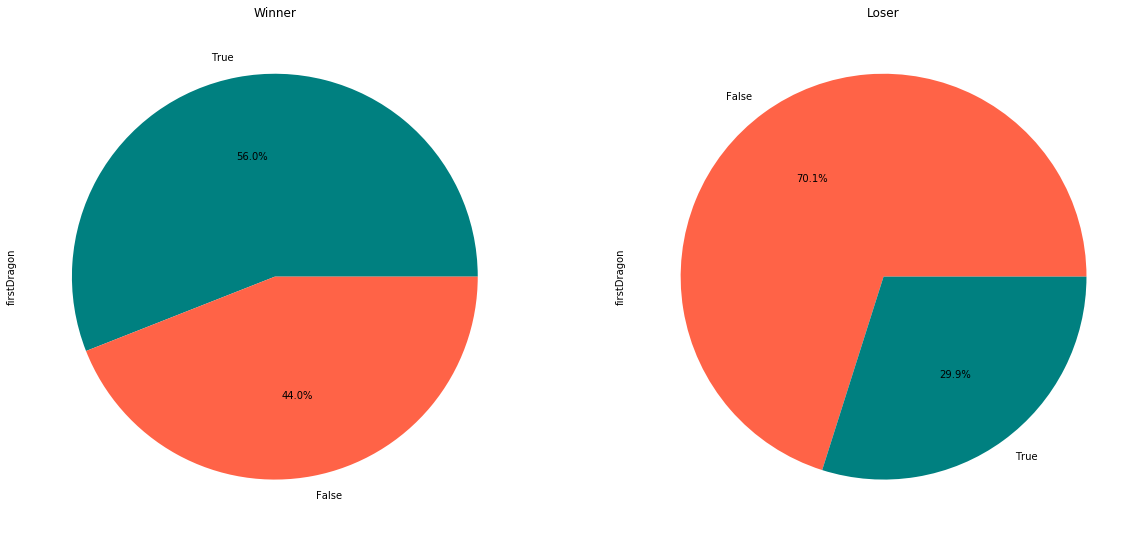

In [74]:
create_piechart_2(fr_winner, fr_loser)

__Impact of First Baron__

In [75]:
fba_winner = df_winner['firstBaron'].value_counts()
fba_loser = df_loser['firstBaron'].value_counts()

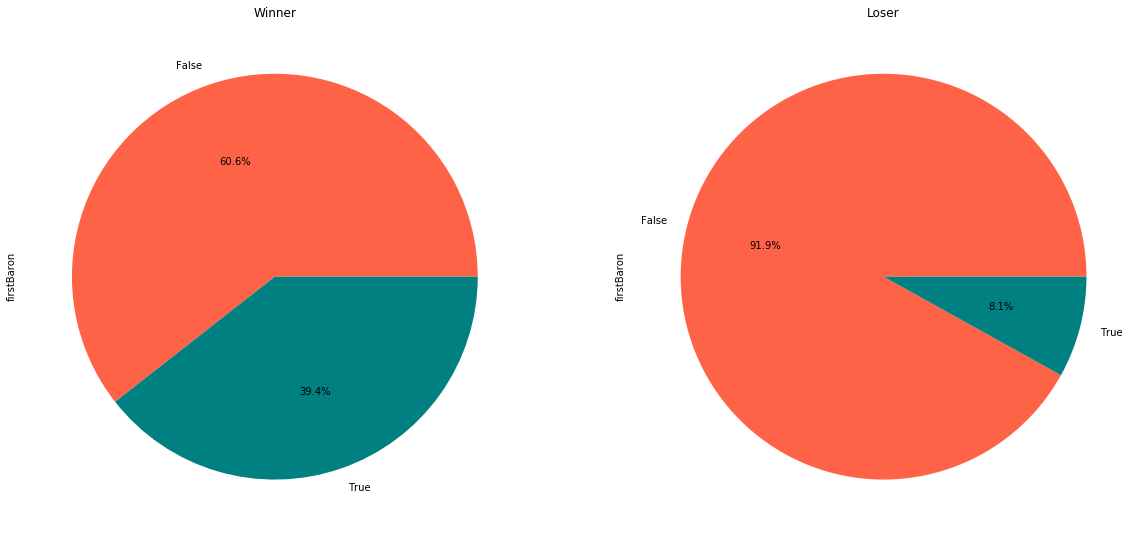

In [76]:
create_piechart_2(fba_winner, fba_loser)

__Impact of First Inhibitor__

In [77]:
fi_winner = df_winner['firstInhibitor'].value_counts()
fi_loser = df_loser['firstInhibitor'].value_counts()

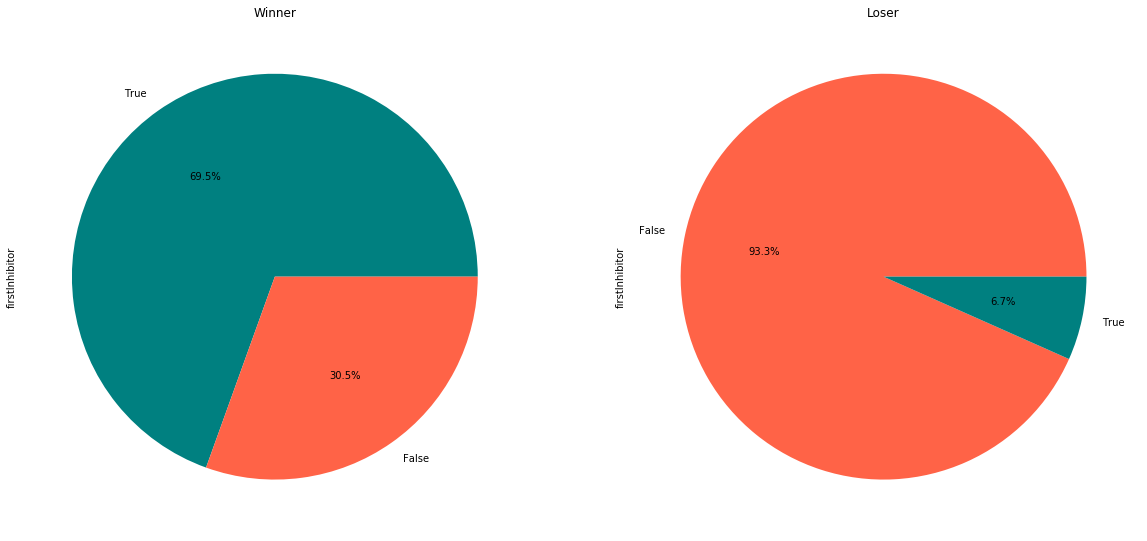

In [78]:
create_piechart_2(fi_winner, fi_loser)

__Analisys of first blood and first tower__

In [79]:
df_1 = df_winner[['firstBlood', 'firstTower']]
df_1 = df_1[(df_1['firstBlood'] == True) & (df_1['firstTower'] == True)]
df_2 = df_winner[['firstBlood', 'firstTower']]
df_2 = df_2[(df_2['firstBlood'] == False) & (df_2['firstTower'] == False)]

In [80]:
df_1 = df_1['firstBlood'].value_counts()
df_2 = df_2['firstBlood'].value_counts()
df = pd.concat([df_1,df_2],axis=0)

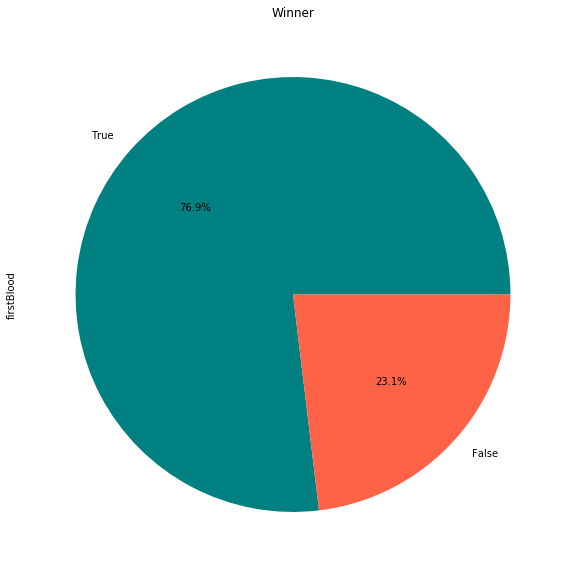

In [81]:
create_piechart_1(df)

__Analisys of first blood, first tower and first baron__

In [82]:
df_1 = df_winner[['firstBlood', 'firstTower', 'firstBaron']]
df_1 = df_1[(df_1['firstBlood'] == True) & (df_1['firstTower'] == True) & (df_1['firstBaron'] == True)]
df_2 = df_winner[['firstBlood', 'firstTower', 'firstBaron']]
df_2 = df_2[(df_2['firstBlood'] == False) & (df_2['firstTower'] == False) & (df_2['firstBaron'] == False)]

In [83]:
df_1 = df_1['firstBlood'].value_counts()
df_2 = df_2['firstBlood'].value_counts()
print(df_1)
print(df_2)
df = pd.concat([df_1,df_2],axis=0)

True    16797
Name: firstBlood, dtype: int64
False    7523
Name: firstBlood, dtype: int64


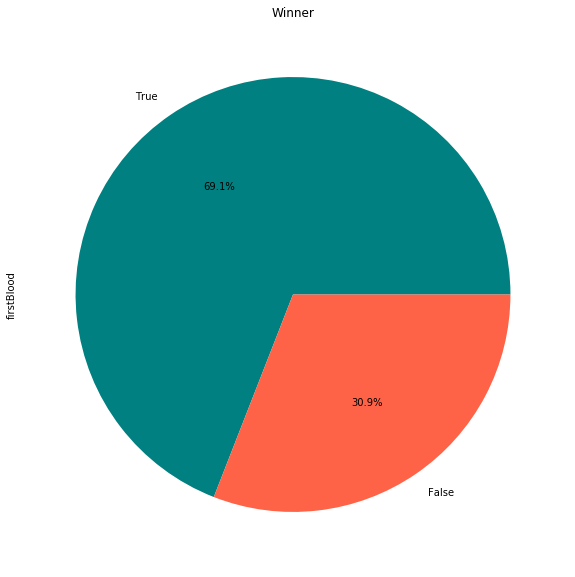

In [84]:
create_piechart_1(df)

In [85]:
df = df_winner[(df_winner['firstBaron'] == False) & (df_winner['baronKills'] > 0)]
df2 = df_winner[(df_winner['firstBaron'] == True)]